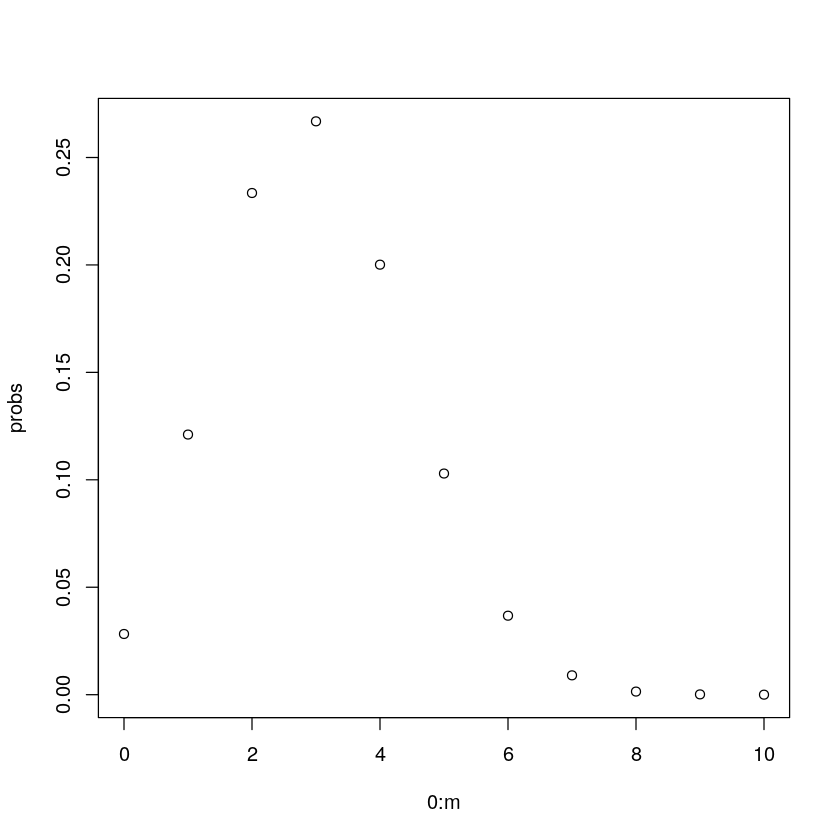

In [3]:
# elegimos la distribución: Binomial(m=10, p=0.3)
# ¿cómo es esa distribución?
m = 10
p = 0.3
probs = dbinom(0:m, size=m, prob=p)
plot(0:m, probs)

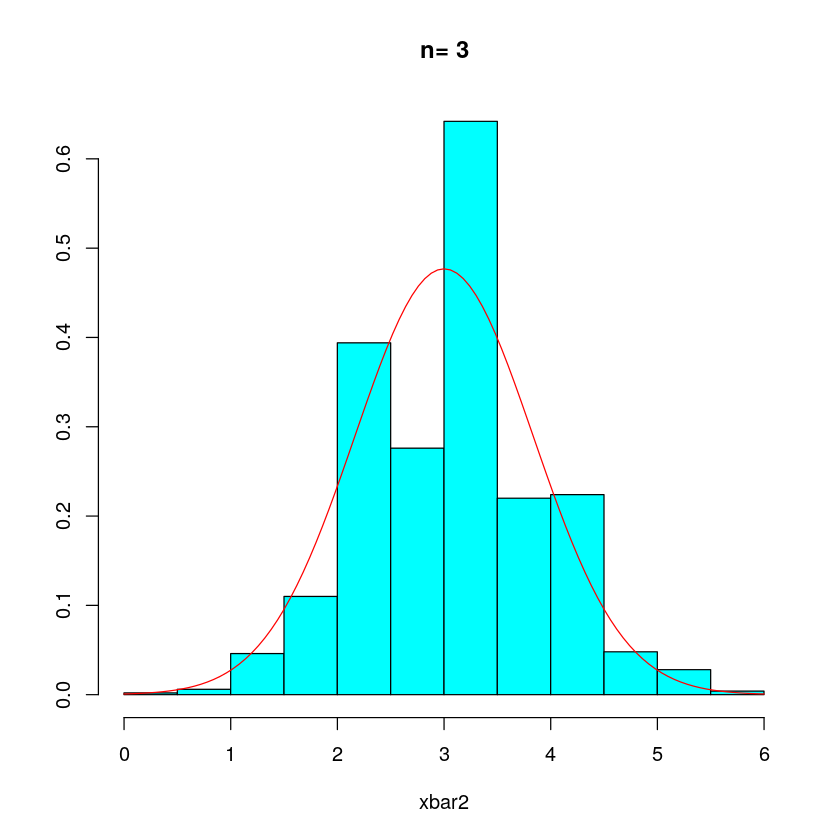

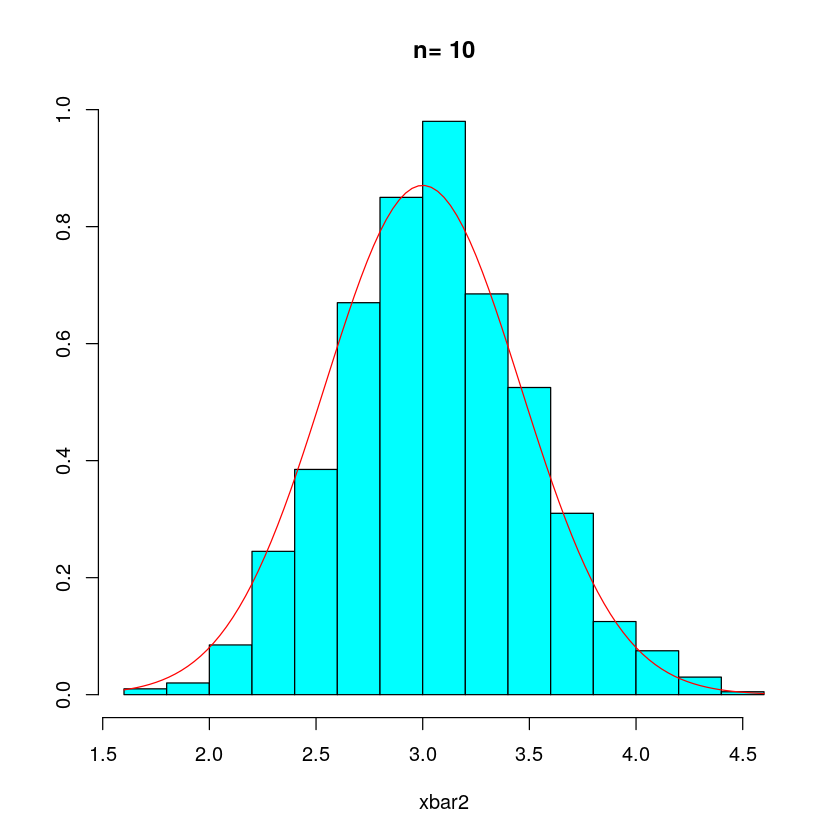

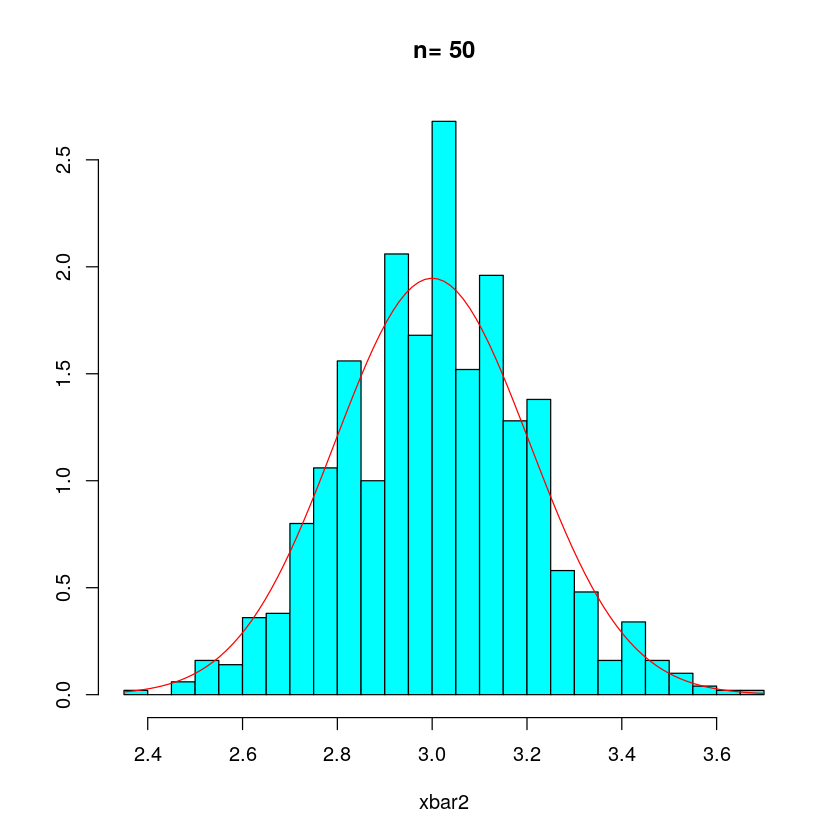

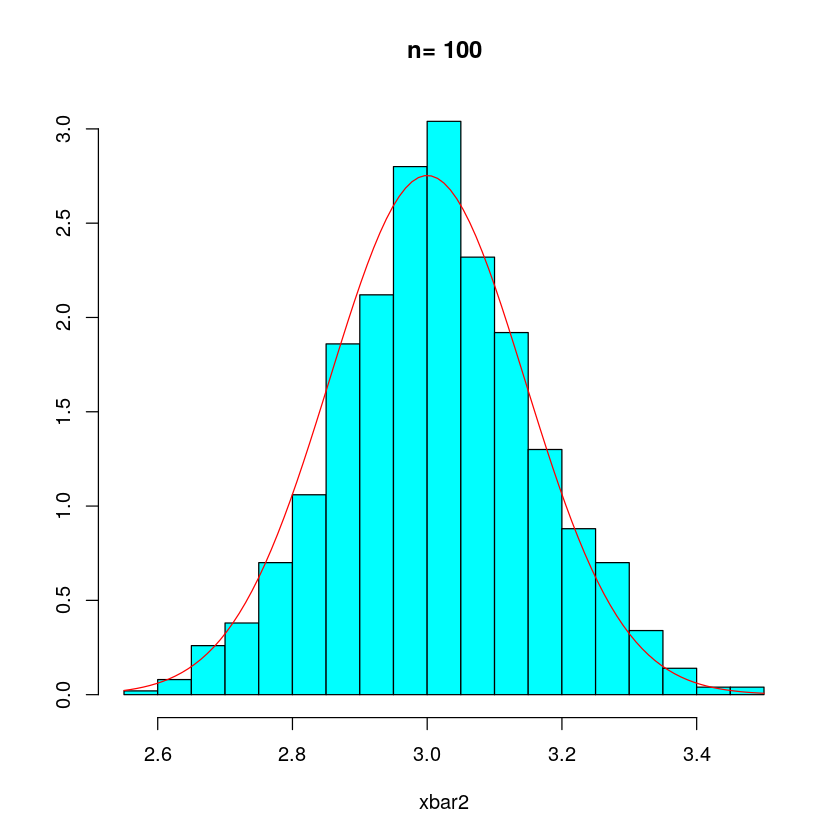

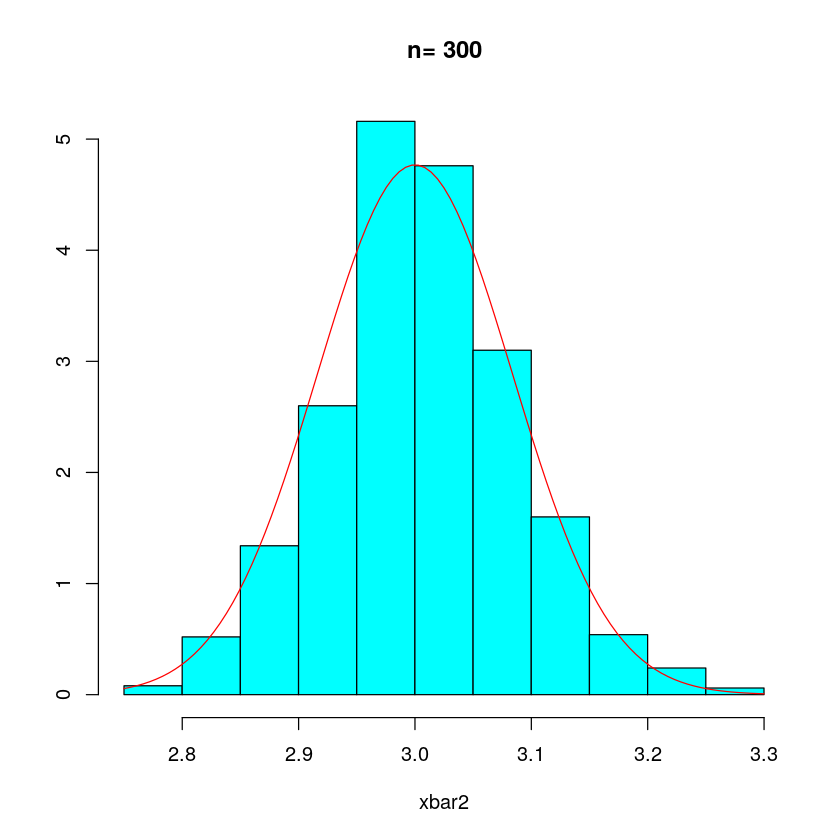

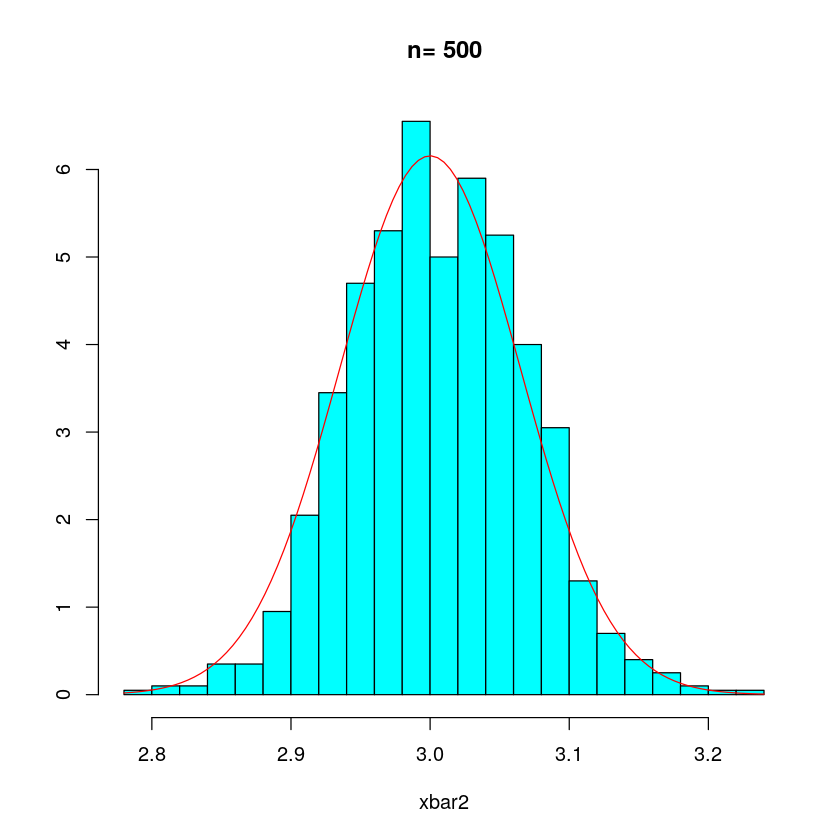

In [1]:
# para poder usar el truehist
library(MASS)

# generar los datos en una matriz
nreps = 1000  # filas
nmax = 500    # columnas
muestra_mtx = matrix(rbinom(nmax*nreps, size=m, prob = p), ncol = nmax, nrow = nreps)

# con esta matriz de datos voy a calcular el promedio por cada fila para un n fijo
xbar = numeric(nreps)
n = nmax

# revisar por que esto no funca!
#for (rep in nreps){
#    xbar[rep] = mean(muestra_mtx[rep,1:n])
#}
#hist(xbar, freq = FALSE)

for (n in c(3, 10, 50, 100, 300, 500)){
    # usando apply aplico lo mismo sin necesidad de hacer un for
    # para ir calculando cada promedio
    xbar2 = apply(muestra_mtx[,1:n], 1, mean)
    #hist(xbar2, freq = FALSE, main=paste("n=",n))
    ## truehist usa la libreria MASS
    truehist(xbar2,main=paste("n=",n)) 

    # Ahora deberíamos superponerle la curva normal
    ## la media es
    media_n = m*p
    ## la varianza de la binomial es
    var_n = m*p*(1-p)/n

    curve(dnorm(x, mean=media_n, sd=sqrt(var_n)), add=TRUE, col="red")
}